In [ ]:
# House Price Analysis: EDA and Outlier Detection

In [2]:
# Q1. Basic EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('house_price.csv')

# Basic info
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

# Unique values in categorical columns
print("\nUnique locations:", df['location'].nunique())
print("Unique sizes:", df['size'].nunique())

Data shape: (13200, 7)

Data types:
 location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

Missing values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

Descriptive statistics:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000     

In [ ]:
# Q2. Outlier Detection and Treatment

In [3]:
# a) Mean and Standard Deviation Method

mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

lower_bound = mean - 3*std
upper_bound = mean + 3*std

outliers_std = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
print("Outliers using std method:", len(outliers_std))

# Capping method
df_std = df.copy()
df_std['price_per_sqft'] = np.where(df_std['price_per_sqft'] > upper_bound, upper_bound,
                                   np.where(df_std['price_per_sqft'] < lower_bound, lower_bound, 
                                           df_std['price_per_sqft']))

Outliers using std method: 5


In [4]:
# b) Percentile Method (5th and 95th percentile)

lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]
print("Outliers using percentile method:", len(outliers_percentile))

# Trimming method
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

Outliers using percentile method: 1320


In [5]:
# c) IQR Method

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_iqr = Q1 - 1.5*IQR
upper_iqr = Q3 + 1.5*IQR

outliers_iqr = df[(df['price_per_sqft'] < lower_iqr) | (df['price_per_sqft'] > upper_iqr)]
print("Outliers using IQR method:", len(outliers_iqr))

# Capping method
df_iqr = df.copy()
df_iqr['price_per_sqft'] = np.where(df_iqr['price_per_sqft'] > upper_iqr, upper_iqr,
                                   np.where(df_iqr['price_per_sqft'] < lower_iqr, lower_iqr, 
                                           df_iqr['price_per_sqft']))

Outliers using IQR method: 1265


In [6]:
# d) Z-Score Method

from scipy import stats
z_scores = stats.zscore(df['price_per_sqft'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)

outliers_z = df[~filtered_entries]
print("Outliers using Z-score method:", len(outliers_z))

# Trimming method
df_z = df[filtered_entries]

Outliers using Z-score method: 5


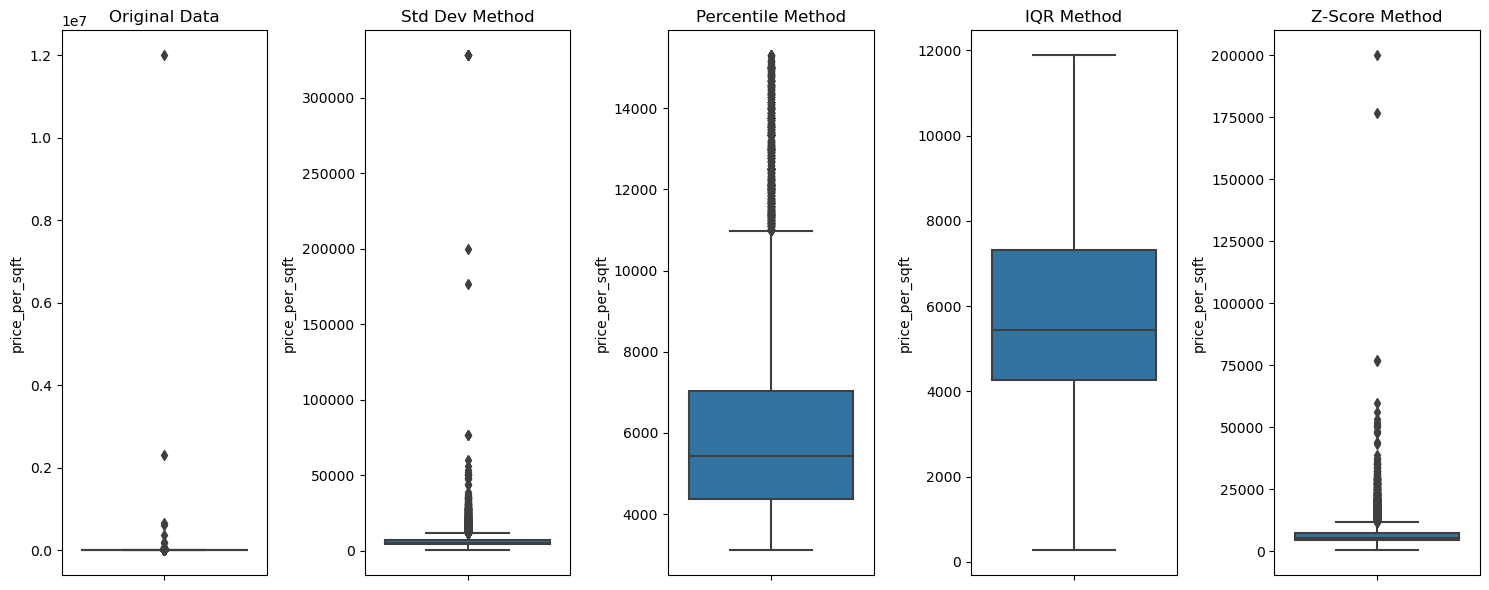

In [7]:
# Q3. Box Plot Comparison

# Create box plots to compare methods
plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
sns.boxplot(y=df['price_per_sqft'])
plt.title('Original Data')

plt.subplot(1, 5, 2)
sns.boxplot(y=df_std['price_per_sqft'])
plt.title('Std Dev Method')

plt.subplot(1, 5, 3)
sns.boxplot(y=df_percentile['price_per_sqft'])
plt.title('Percentile Method')

plt.subplot(1, 5, 4)
sns.boxplot(y=df_iqr['price_per_sqft'])
plt.title('IQR Method')

plt.subplot(1, 5, 5)
sns.boxplot(y=df_z['price_per_sqft'])
plt.title('Z-Score Method')

plt.tight_layout()
plt.show()

Original Skewness: 108.28105529705168
Original Kurtosis: 12095.21502832288

After Log Transformation:
Skewness: 1.4004850530059296
Kurtosis: 9.206942162860814


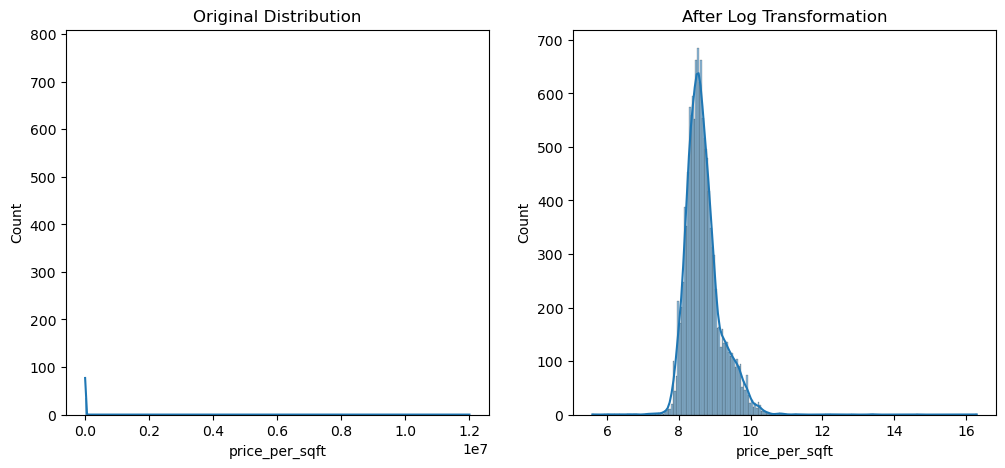

In [8]:
# Q4. Normality Check and Transformations

# Check skewness and kurtosis before transformation

print("Original Skewness:", df['price_per_sqft'].skew())
print("Original Kurtosis:", df['price_per_sqft'].kurtosis())

# Plot original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Original Distribution')

# Apply log transformation
df_log = df.copy()
df_log['price_per_sqft'] = np.log1p(df_log['price_per_sqft'])

print("\nAfter Log Transformation:")
print("Skewness:", df_log['price_per_sqft'].skew())
print("Kurtosis:", df_log['price_per_sqft'].kurtosis())

plt.subplot(1, 2, 2)
sns.histplot(df_log['price_per_sqft'], kde=True)
plt.title('After Log Transformation')
plt.show()

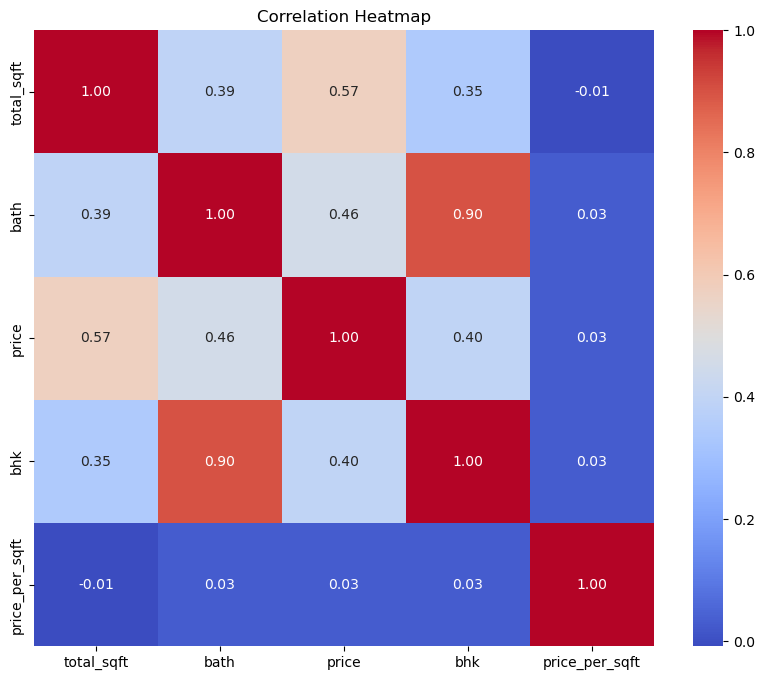

In [14]:
# Q5. Correlation Analysis

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

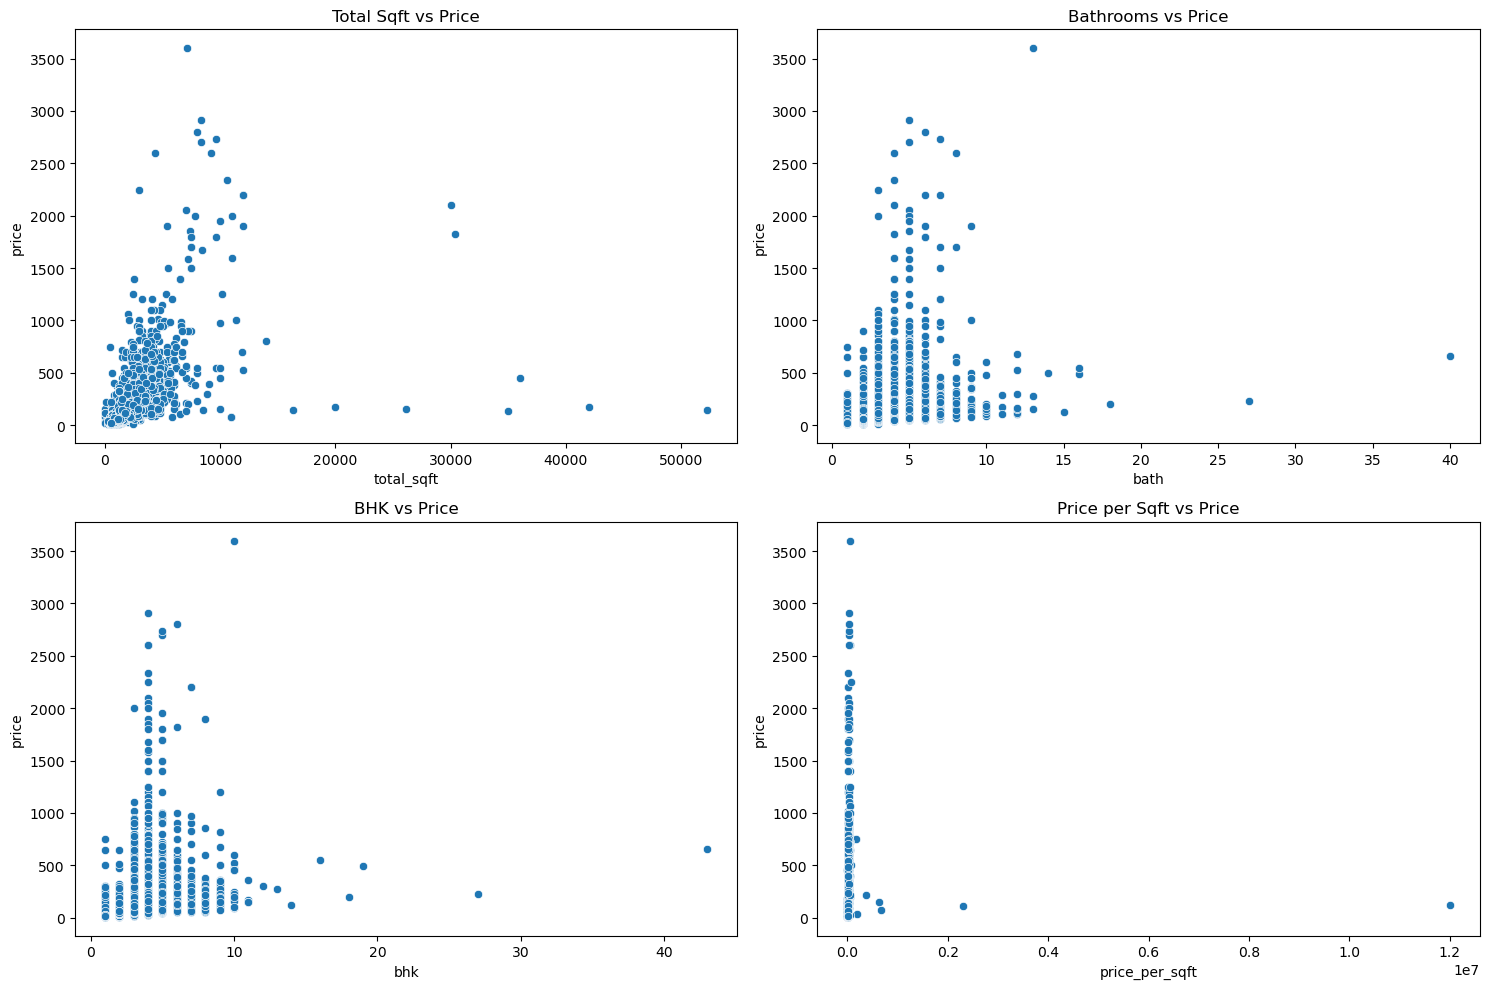

In [15]:
# Q6. Scatter Plots

# Scatter plots for key relationships
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Total Sqft vs Price')

plt.subplot(2, 2, 2)
sns.scatterplot(x='bath', y='price', data=df)
plt.title('Bathrooms vs Price')

plt.subplot(2, 2, 3)
sns.scatterplot(x='bhk', y='price', data=df)
plt.title('BHK vs Price')

plt.subplot(2, 2, 4)
sns.scatterplot(x='price_per_sqft', y='price', data=df)
plt.title('Price per Sqft vs Price')

plt.tight_layout()
plt.show()